In [1]:
from sklearn.ensemble import RandomForestClassifier as RandomForest
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import sklearn.metrics as metrics
import warnings

In [2]:
adnimerge = pd.read_csv('data-test(CNvsAD文章数据).csv') # 读取全部数据
adnimerge.head()

,RID,Label,Visit_Code,RBM Sample ID,Sample_Received_Date,Alpha-1-Microglobulin (A1Micro) (ug/ml),Alpha-2-Macroglobulin (A2Macro) (mg/mL),Alpha-1-Antichymotrypsin (AACT) (ug/ml),Alpha-1-Antitrypsin (AAT) (mg/mL),Angiotensin-Converting Enzyme (ACE) (ng/ml),...,Thrombopoietin (ng/mL),TNF-Related Apoptosis-Inducing Ligand Re (ng/mL),Serotransferrin (Transferrin) (mg/dl),Thyroid-Stimulating Hormone (TSH) (uIU/mL),Transthyretin (TTR) (mg/dl),Vascular Cell Adhesion Molecule-1 (VCAM- (ng/mL),Vascular Endothelial Growth Factor (VEGF (pg/mL),Vitronectin (ug/ml),Vitamin K-Dependent Protein S (VKDPS) (ug/ml),von Willebrand Factor (vWF) (ug/mL)
0,3,AD,bl,KA8000CL-02,13-Sep-05,1.17609,0.07918,2.33445,0.44716,2.00432,...,1.3,1.34242,3.41330,0.55630,2.68305,2.98722,2.97035,2.96379,1.23045,1.14613
1,8,CN,bl,GA8000D4-02,20-Sep-05,0.97313,0.27875,3.12710,0.50515,1.97772,...,2.1,0.75587,3.46982,0.32222,2.67943,2.86153,2.81954,2.88986,1.41497,1.89763
2,8,CN,m12,HA803FG6-02,21-Sep-06,0.94448,0.07918,3.16137,0.49136,1.96848,...,3.4,0.69897,3.37475,0.44716,2.50651,2.88423,2.87099,2.97081,1.41497,1.83251
3,10,AD,bl,AA80013M-03,11-Nov-05,1.14613,0.07918,2.41664,0.38021,2.10721,...,1.3,1.23045,3.35984,0.41497,2.40654,2.88024,2.74741,2.88536,1.23045,1.51851
4,14,CN,bl,BA802V7G-02,7-Nov-05,1.00000,0.07918,2.52244,0.47712,1.93952,...,1.0,1.14613,3.41830,0.07918,2.68124,2.68124,2.73400,2.90526,1.30103,1.77815


In [3]:
adnimerge['Label'].value_counts() # 重新查看目标分布

AD    112
CN    112
Name: Label, dtype: int64

In [4]:
# 查看全部数据大小
adnimerge.shape

(224, 151)

In [5]:
# 缺失值计数
for col in adnimerge.columns:
    print(col, adnimerge[col].isnull().sum())

RID 0
Label 0
Visit_Code 0
RBM Sample ID 0
Sample_Received_Date 0
Alpha-1-Microglobulin (A1Micro) (ug/ml) 0
Alpha-2-Macroglobulin (A2Macro) (mg/mL) 0
Alpha-1-Antichymotrypsin (AACT) (ug/ml) 0
Alpha-1-Antitrypsin (AAT) (mg/mL) 0
Angiotensin-Converting Enzyme (ACE) (ng/ml) 0
Adiponectin (ug/mL) 0
Alpha-Fetoprotein (AFP) (ng/mL) 0
Agouti-Related Protein (AGRP) (pg/mL) 0
Angiopoietin-2 (ANG-2) (ng/mL) 0
Angiotensinogen (ng/mL) 0
Apolipoprotein A-I (Apo A-I) (mg/mL) 0
Apolipoprotein A-II (Apo A-II) (ng/ml) 0
Apolipoprotein A-IV (Apo A-IV) (ug/ml) 0
Apolipoprotein B (Apo B) (ug/ml) 0
Apolipoprotein C-I (Apo C-I) (ng/ml) 0
Apolipoprotein C-III (Apo C-III) (ug/mL) 0
Apolipoprotein D (Apo D) (ug/ml) 0
Apolipoprotein E (Apo E) (ug/ml) 0
Apolipoprotein H (Apo H) (ug/mL) 0
AXL Receptor Tyrosine Kinase (AXL) (ng/mL) 0
Beta-2-Microglobulin (B2M) (ug/mL) 0
Brain-Derived Neurotrophic Factor (BDNF) (ng/mL) 0
B Lymphocyte Chemoattractant (BLC) (pg/ml) 0
Bone Morphogenetic Protein 6 (BMP-6) (ng/mL) 0
Bra

In [6]:
#根据文献筛选的特征
data=adnimerge[['Label','Alpha-1-Microglobulin (A1Micro) (ug/ml)','Apolipoprotein E (Apo E) (ug/ml)','Brain Natriuretic Peptide  (BNP) (pg/ml)',
                 'Interleukin-16 (IL-16) (pg/mL)','Serum Glutamic Oxaloacetic Transaminase (ug/mL)'
               ]]

data

,Label,Alpha-1-Microglobulin (A1Micro) (ug/ml),Apolipoprotein E (Apo E) (ug/ml),Brain Natriuretic Peptide (BNP) (pg/ml),Interleukin-16 (IL-16) (pg/mL),Serum Glutamic Oxaloacetic Transaminase (ug/mL)
0,AD,1.17609,1.57978,3.11394,2.50651,2.3
1,CN,0.97313,2.06819,2.89818,2.71265,4.3
2,CN,0.94448,2.06819,2.95182,2.69285,7.1
3,AD,1.14613,1.88649,3.23300,2.60638,2.3
4,CN,1.00000,1.86332,2.40483,2.60206,3.0
...,...,...,...,...,...,...
219,AD,0.92942,1.69020,3.28330,2.35793,3.1
220,AD,1.07918,1.83885,2.87390,2.47857,2.8
221,AD,1.14613,1.87506,2.96895,2.52763,3.7
222,AD,1.00000,1.79239,2.60959,2.53020,2.5


In [7]:
cols_with_na=[]

for column in data:
    if data[column].isnull().any()==True:
        cols_with_na.append(column)

# 平均值填充
meandf = data.copy()
for col in cols_with_na:
    if data[col].dtype=='float64':
        meandf[col] = data[col].fillna(data[col].mean())
    else: #对于非数字数据
        meandf[col] = data[col].fillna(data[col].mode()[0])
        
np.any(pd.isnull(meandf)) # If `False`，确认 meandf 现在是无 Nan 的

False

In [8]:
meandf.head()

,Label,Alpha-1-Microglobulin (A1Micro) (ug/ml),Apolipoprotein E (Apo E) (ug/ml),Brain Natriuretic Peptide (BNP) (pg/ml),Interleukin-16 (IL-16) (pg/mL),Serum Glutamic Oxaloacetic Transaminase (ug/mL)
0,AD,1.17609,1.57978,3.11394,2.50651,2.3
1,CN,0.97313,2.06819,2.89818,2.71265,4.3
2,CN,0.94448,2.06819,2.95182,2.69285,7.1
3,AD,1.14613,1.88649,3.23300,2.60638,2.3
4,CN,1.00000,1.86332,2.40483,2.60206,3.0


In [9]:
# 对目标进行映射编码
mapping = {
           'CN': 0,
           'AD': 1,
#           'MCI': 2,
#           'EMCI':3,
#           'SMC':4
}
meandf['Label'] =meandf['Label'].map(mapping)
meandf.head()

,Label,Alpha-1-Microglobulin (A1Micro) (ug/ml),Apolipoprotein E (Apo E) (ug/ml),Brain Natriuretic Peptide (BNP) (pg/ml),Interleukin-16 (IL-16) (pg/mL),Serum Glutamic Oxaloacetic Transaminase (ug/mL)
0,1,1.17609,1.57978,3.11394,2.50651,2.3
1,0,0.97313,2.06819,2.89818,2.71265,4.3
2,0,0.94448,2.06819,2.95182,2.69285,7.1
3,1,1.14613,1.88649,3.23300,2.60638,2.3
4,0,1.00000,1.86332,2.40483,2.60206,3.0


In [10]:
meandf.isnull().sum()

Label                                              0
Alpha-1-Microglobulin (A1Micro) (ug/ml)            0
Apolipoprotein E (Apo E) (ug/ml)                   0
Brain Natriuretic Peptide  (BNP) (pg/ml)           0
Interleukin-16 (IL-16) (pg/mL)                     0
Serum Glutamic Oxaloacetic Transaminase (ug/mL)    0
dtype: int64

In [11]:
X=meandf.drop(['Label'],axis=1)#把RID，标签，测试时间这些非数据信息分开
y=meandf['Label']#标签信息
X

,Alpha-1-Microglobulin (A1Micro) (ug/ml),Apolipoprotein E (Apo E) (ug/ml),Brain Natriuretic Peptide (BNP) (pg/ml),Interleukin-16 (IL-16) (pg/mL),Serum Glutamic Oxaloacetic Transaminase (ug/mL)
0,1.17609,1.57978,3.11394,2.50651,2.3
1,0.97313,2.06819,2.89818,2.71265,4.3
2,0.94448,2.06819,2.95182,2.69285,7.1
3,1.14613,1.88649,3.23300,2.60638,2.3
4,1.00000,1.86332,2.40483,2.60206,3.0
...,...,...,...,...,...
219,0.92942,1.69020,3.28330,2.35793,3.1
220,1.07918,1.83885,2.87390,2.47857,2.8
221,1.14613,1.87506,2.96895,2.52763,3.7
222,1.00000,1.79239,2.60959,2.53020,2.5


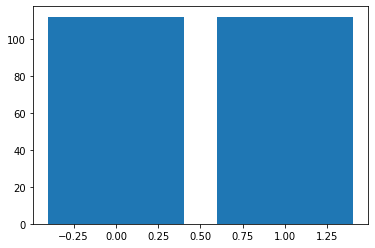

In [12]:
plt.bar(y.value_counts().index, y.value_counts())
plt.show()

In [13]:
# # 特征缩放，归一化
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [14]:
#RF
from sklearn.ensemble import RandomForestClassifier
model_RF = RandomForestClassifier(random_state=10, n_estimators=100)

In [15]:
#K折交叉验证简单例子  RF
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
#model = classifier#建立一个模型
kf=KFold(n_splits=5,shuffle=True)#建立k折
rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state =100)#建立rkf
print(cross_val_score(model_RF, X, y, scoring='accuracy', cv=kf))#将k折应用到模型，并返回结果。
#cross_val_score是一个计算得分的函数

[0.8        0.77777778 0.64444444 0.77777778 0.84090909]


In [16]:
def false_positive_rate(y_true, y_pred):

    # false positive
    fp = ((y_pred == 1) & (y_true == 0)).sum()

    # true negative
    tn = ((y_pred == 0) & (y_true == 0)).sum()

    # false positive rate
    return fp / (fp + tn)

In [17]:
#逻辑回归
from sklearn.linear_model import LogisticRegression
model_LR = LogisticRegression()

In [18]:
#交叉验证 SVM
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.model_selection import cross_validate #评价多个指标
from sklearn.pipeline import Pipeline#标准化集成
scoring = {'acc': 'accuracy',
           'precison': 'precision_macro',
           'recall': 'recall_macro',
           'F1-scores': 'f1_macro',
           'false_positive_rate': make_scorer(false_positive_rate),
           'AUC': 'roc_auc'}

pipeline = Pipeline([('transformer', sc), ('estimator', model_LR)])#标准化

scores = cross_validate(pipeline, X, y, scoring=scoring,
                         cv=rkf, return_train_score=True)

print(scores.keys())
print("accuracy:",scores['test_acc'].mean())  
print("precison:",scores['test_precison'].mean())
print("recall:",scores['test_recall'].mean())
print("F1-scores:",scores['test_F1-scores'].mean())
print("test_false_positive_rate:",scores['test_false_positive_rate'].mean()) 
print("AUC:",scores['test_AUC'].mean())

dict_keys(['fit_time', 'score_time', 'test_acc', 'train_acc', 'test_precison', 'train_precison', 'test_recall', 'train_recall', 'test_F1-scores', 'train_F1-scores', 'test_false_positive_rate', 'train_false_positive_rate', 'test_AUC', 'train_AUC'])
accuracy: 0.7825353535353535
precison: 0.7849785542435689
recall: 0.7846994899730647
F1-scores: 0.7800730687079505
test_false_positive_rate: 0.20890756143593667
AUC: 0.8866861211341696


In [33]:
#逻辑回归
from sklearn.linear_model import LogisticRegression
model_LR = LogisticRegression()

In [34]:
#交叉验证 LR
from sklearn.model_selection import cross_validate #评价多个指标
from sklearn.pipeline import Pipeline#标准化集成
scoring = {'acc': 'accuracy',
           'precison': 'precision_macro',
           'recall': 'recall_macro',
           'F1-scores': 'f1_macro'}

pipeline = Pipeline([('transformer', sc), ('estimator', model_LR)])#标准化

scores = cross_validate(pipeline, X, y, scoring=scoring,
                         cv=rkf, return_train_score=True)

print(scores.keys())
print("accuracy:",scores['test_acc'].mean())  
print("precison:",scores['test_precison'].mean())
print("recall:",scores['test_recall'].mean())
print("F1-scores:",scores['test_F1-scores'].mean())

dict_keys(['fit_time', 'score_time', 'test_acc', 'train_acc', 'test_precison', 'train_precison', 'test_recall', 'train_recall', 'test_F1-scores', 'train_F1-scores'])
accuracy: 0.7986111111111112
precison: 0.7967800017513165
recall: 0.7985764501295107
F1-scores: 0.7938001369657239


In [36]:
#catboost
from catboost import CatBoostClassifier#Catboost集成学习分类器

model_CB = CatBoostClassifier(iterations=1000,learning_rate=0.1,max_depth=7,verbose=100,
                                      early_stopping_rounds=500,task_type='GPU',eval_metric='AUC',
                                      )

In [37]:
#交叉验证 catboost
from sklearn.model_selection import cross_validate #评价多个指标
from sklearn.pipeline import Pipeline#标准化集成
scoring = {'acc': 'accuracy',
           'precison': 'precision_macro',
           'recall': 'recall_macro',
           'F1-scores': 'f1_macro'}

pipeline = Pipeline([('transformer', sc), ('estimator', model_CB)])#标准化

scores = cross_validate(pipeline, X, y, scoring=scoring,
                         cv=rkf, return_train_score=True)

print(scores.keys())
print("accuracy:",scores['test_acc'].mean())  
print("precison:",scores['test_precison'].mean())
print("recall:",scores['test_recall'].mean())
print("F1-scores:",scores['test_F1-scores'].mean())

Default metric period is 5 because AUC is/are not implemented for GPU
AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	total: 31.9ms	remaining: 31.9s
100:	total: 888ms	remaining: 7.91s
200:	total: 1.7s	remaining: 6.75s
300:	total: 2.5s	remaining: 5.81s
400:	total: 3.31s	remaining: 4.94s
500:	total: 4.1s	remaining: 4.08s
600:	total: 4.9s	remaining: 3.25s
700:	total: 5.7s	remaining: 2.43s
800:	total: 6.51s	remaining: 1.62s
900:	total: 7.31s	remaining: 803ms
999:	total: 8.11s	remaining: 0us


Default metric period is 5 because AUC is/are not implemented for GPU
AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	total: 9.94ms	remaining: 9.93s
100:	total: 853ms	remaining: 7.59s
200:	total: 1.69s	remaining: 6.71s
300:	total: 2.52s	remaining: 5.86s
400:	total: 3.35s	remaining: 5.01s
500:	total: 4.21s	remaining: 4.19s
600:	total: 5.04s	remaining: 3.35s
700:	total: 5.88s	remaining: 2.51s
800:	total: 6.71s	remaining: 1.67s
900:	total: 7.55s	remaining: 829ms
999:	total: 8.41s	remaining: 0us


Default metric period is 5 because AUC is/are not implemented for GPU
AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	total: 10.3ms	remaining: 10.2s
100:	total: 871ms	remaining: 7.75s
200:	total: 1.73s	remaining: 6.89s
300:	total: 2.6s	remaining: 6.04s
400:	total: 3.45s	remaining: 5.16s
500:	total: 4.28s	remaining: 4.26s
600:	total: 5.1s	remaining: 3.38s
700:	total: 5.93s	remaining: 2.53s
800:	total: 6.76s	remaining: 1.68s
900:	total: 7.59s	remaining: 834ms
999:	total: 8.41s	remaining: 0us


Default metric period is 5 because AUC is/are not implemented for GPU
AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	total: 9.69ms	remaining: 9.68s
100:	total: 866ms	remaining: 7.71s
200:	total: 1.7s	remaining: 6.77s
300:	total: 2.58s	remaining: 6s
400:	total: 3.44s	remaining: 5.13s
500:	total: 4.28s	remaining: 4.26s
600:	total: 5.12s	remaining: 3.4s
700:	total: 5.96s	remaining: 2.54s
800:	total: 6.8s	remaining: 1.69s
900:	total: 7.65s	remaining: 841ms
999:	total: 8.48s	remaining: 0us


Default metric period is 5 because AUC is/are not implemented for GPU
AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	total: 9.77ms	remaining: 9.76s
100:	total: 856ms	remaining: 7.62s
200:	total: 1.77s	remaining: 7.05s
300:	total: 2.68s	remaining: 6.22s
400:	total: 3.57s	remaining: 5.34s
500:	total: 4.39s	remaining: 4.37s
600:	total: 5.22s	remaining: 3.47s
700:	total: 6.07s	remaining: 2.59s
800:	total: 6.91s	remaining: 1.72s
900:	total: 7.7s	remaining: 846ms
999:	total: 8.49s	remaining: 0us


Default metric period is 5 because AUC is/are not implemented for GPU
AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	total: 10.9ms	remaining: 10.9s
100:	total: 944ms	remaining: 8.41s
200:	total: 1.84s	remaining: 7.3s
300:	total: 2.69s	remaining: 6.24s
400:	total: 3.53s	remaining: 5.28s
500:	total: 4.4s	remaining: 4.38s
600:	total: 5.26s	remaining: 3.49s
700:	total: 6.17s	remaining: 2.63s
800:	total: 7.03s	remaining: 1.75s
900:	total: 7.91s	remaining: 869ms
999:	total: 8.75s	remaining: 0us


Default metric period is 5 because AUC is/are not implemented for GPU
AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	total: 9.53ms	remaining: 9.52s
100:	total: 860ms	remaining: 7.65s
200:	total: 1.7s	remaining: 6.75s
300:	total: 2.52s	remaining: 5.85s
400:	total: 3.35s	remaining: 5s
500:	total: 4.18s	remaining: 4.17s
600:	total: 5.01s	remaining: 3.33s
700:	total: 5.92s	remaining: 2.52s
800:	total: 6.82s	remaining: 1.69s
900:	total: 7.69s	remaining: 845ms
999:	total: 8.51s	remaining: 0us


Default metric period is 5 because AUC is/are not implemented for GPU
AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	total: 8.86ms	remaining: 8.85s
100:	total: 852ms	remaining: 7.58s
200:	total: 1.73s	remaining: 6.87s
300:	total: 2.61s	remaining: 6.05s
400:	total: 3.48s	remaining: 5.2s
500:	total: 4.39s	remaining: 4.38s
600:	total: 5.22s	remaining: 3.46s
700:	total: 6.05s	remaining: 2.58s
800:	total: 6.94s	remaining: 1.72s
900:	total: 7.76s	remaining: 853ms
999:	total: 8.58s	remaining: 0us


Default metric period is 5 because AUC is/are not implemented for GPU
AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	total: 10.5ms	remaining: 10.5s
100:	total: 861ms	remaining: 7.67s
200:	total: 1.69s	remaining: 6.7s
300:	total: 2.52s	remaining: 5.85s
400:	total: 3.35s	remaining: 5.01s
500:	total: 4.2s	remaining: 4.18s
600:	total: 5.07s	remaining: 3.36s
700:	total: 5.91s	remaining: 2.52s
800:	total: 6.74s	remaining: 1.67s
900:	total: 7.57s	remaining: 831ms
999:	total: 8.41s	remaining: 0us


Default metric period is 5 because AUC is/are not implemented for GPU
AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	total: 10.7ms	remaining: 10.7s
100:	total: 896ms	remaining: 7.98s
200:	total: 1.78s	remaining: 7.08s
300:	total: 2.71s	remaining: 6.29s
400:	total: 3.62s	remaining: 5.4s
500:	total: 4.49s	remaining: 4.47s
600:	total: 5.33s	remaining: 3.54s
700:	total: 6.18s	remaining: 2.64s
800:	total: 7.02s	remaining: 1.74s
900:	total: 7.86s	remaining: 864ms
999:	total: 8.69s	remaining: 0us


Default metric period is 5 because AUC is/are not implemented for GPU
AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	total: 9.73ms	remaining: 9.72s
100:	total: 854ms	remaining: 7.6s
200:	total: 1.69s	remaining: 6.7s
300:	total: 2.52s	remaining: 5.84s
400:	total: 3.35s	remaining: 5s
500:	total: 4.17s	remaining: 4.15s
600:	total: 5s	remaining: 3.32s
700:	total: 5.82s	remaining: 2.48s
800:	total: 6.64s	remaining: 1.65s
900:	total: 7.46s	remaining: 820ms
999:	total: 8.28s	remaining: 0us


Default metric period is 5 because AUC is/are not implemented for GPU
AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	total: 10.1ms	remaining: 10.1s
100:	total: 838ms	remaining: 7.46s
200:	total: 1.66s	remaining: 6.59s
300:	total: 2.48s	remaining: 5.75s
400:	total: 3.3s	remaining: 4.93s
500:	total: 4.12s	remaining: 4.11s
600:	total: 5.01s	remaining: 3.32s
700:	total: 5.84s	remaining: 2.49s
800:	total: 6.66s	remaining: 1.66s
900:	total: 7.47s	remaining: 821ms
999:	total: 8.28s	remaining: 0us


Default metric period is 5 because AUC is/are not implemented for GPU
AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	total: 9.04ms	remaining: 9.03s
100:	total: 868ms	remaining: 7.73s
200:	total: 1.71s	remaining: 6.81s
300:	total: 2.55s	remaining: 5.93s
400:	total: 3.41s	remaining: 5.09s
500:	total: 4.26s	remaining: 4.24s
600:	total: 5.1s	remaining: 3.38s
700:	total: 5.95s	remaining: 2.54s
800:	total: 6.78s	remaining: 1.68s
900:	total: 7.64s	remaining: 839ms
999:	total: 8.5s	remaining: 0us


Default metric period is 5 because AUC is/are not implemented for GPU
AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	total: 9.43ms	remaining: 9.42s
100:	total: 853ms	remaining: 7.59s
200:	total: 1.7s	remaining: 6.74s
300:	total: 2.56s	remaining: 5.94s
400:	total: 3.43s	remaining: 5.12s
500:	total: 4.32s	remaining: 4.3s
600:	total: 5.2s	remaining: 3.45s
700:	total: 6.05s	remaining: 2.58s
800:	total: 6.97s	remaining: 1.73s
900:	total: 7.83s	remaining: 861ms
999:	total: 8.67s	remaining: 0us


Default metric period is 5 because AUC is/are not implemented for GPU
AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	total: 9.42ms	remaining: 9.41s
100:	total: 858ms	remaining: 7.64s
200:	total: 1.7s	remaining: 6.77s
300:	total: 2.64s	remaining: 6.12s
400:	total: 3.57s	remaining: 5.33s
500:	total: 4.42s	remaining: 4.4s
600:	total: 5.26s	remaining: 3.49s
700:	total: 6.12s	remaining: 2.61s
800:	total: 6.96s	remaining: 1.73s
900:	total: 7.85s	remaining: 862ms
999:	total: 8.72s	remaining: 0us


Default metric period is 5 because AUC is/are not implemented for GPU
AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	total: 11.5ms	remaining: 11.5s
100:	total: 907ms	remaining: 8.07s
200:	total: 1.73s	remaining: 6.88s
300:	total: 2.55s	remaining: 5.92s
400:	total: 3.37s	remaining: 5.03s
500:	total: 4.19s	remaining: 4.17s
600:	total: 5.02s	remaining: 3.33s
700:	total: 5.83s	remaining: 2.49s
800:	total: 6.7s	remaining: 1.67s
900:	total: 7.59s	remaining: 834ms
999:	total: 8.45s	remaining: 0us


Default metric period is 5 because AUC is/are not implemented for GPU
AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	total: 9.33ms	remaining: 9.32s
100:	total: 888ms	remaining: 7.9s
200:	total: 1.72s	remaining: 6.86s
300:	total: 2.57s	remaining: 5.96s
400:	total: 3.38s	remaining: 5.04s
500:	total: 4.22s	remaining: 4.2s
600:	total: 5.07s	remaining: 3.36s
700:	total: 5.93s	remaining: 2.53s
800:	total: 6.73s	remaining: 1.67s
900:	total: 7.52s	remaining: 827ms
999:	total: 8.31s	remaining: 0us


Default metric period is 5 because AUC is/are not implemented for GPU
AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	total: 9.84ms	remaining: 9.83s
100:	total: 872ms	remaining: 7.76s
200:	total: 1.72s	remaining: 6.86s
300:	total: 2.57s	remaining: 5.98s
400:	total: 3.41s	remaining: 5.1s
500:	total: 4.26s	remaining: 4.25s
600:	total: 5.1s	remaining: 3.38s
700:	total: 5.94s	remaining: 2.53s
800:	total: 6.77s	remaining: 1.68s
900:	total: 7.6s	remaining: 835ms
999:	total: 8.43s	remaining: 0us


Default metric period is 5 because AUC is/are not implemented for GPU
AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	total: 9.94ms	remaining: 9.93s
100:	total: 849ms	remaining: 7.55s
200:	total: 1.68s	remaining: 6.69s
300:	total: 2.55s	remaining: 5.93s
400:	total: 3.38s	remaining: 5.05s
500:	total: 4.21s	remaining: 4.19s
600:	total: 5.03s	remaining: 3.34s
700:	total: 5.86s	remaining: 2.5s
800:	total: 6.69s	remaining: 1.66s
900:	total: 7.51s	remaining: 826ms
999:	total: 8.33s	remaining: 0us


Default metric period is 5 because AUC is/are not implemented for GPU
AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	total: 9.34ms	remaining: 9.33s
100:	total: 841ms	remaining: 7.48s
200:	total: 1.7s	remaining: 6.75s
300:	total: 2.58s	remaining: 5.99s
400:	total: 3.48s	remaining: 5.21s
500:	total: 4.42s	remaining: 4.4s
600:	total: 5.42s	remaining: 3.6s
700:	total: 6.36s	remaining: 2.71s
800:	total: 7.25s	remaining: 1.8s
900:	total: 8.13s	remaining: 893ms
999:	total: 9s	remaining: 0us


Default metric period is 5 because AUC is/are not implemented for GPU
AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	total: 9.94ms	remaining: 9.93s
100:	total: 908ms	remaining: 8.08s
200:	total: 1.8s	remaining: 7.16s
300:	total: 2.73s	remaining: 6.33s
400:	total: 3.63s	remaining: 5.42s
500:	total: 4.57s	remaining: 4.55s
600:	total: 5.56s	remaining: 3.69s
700:	total: 6.46s	remaining: 2.75s
800:	total: 7.35s	remaining: 1.83s
900:	total: 8.25s	remaining: 907ms
999:	total: 9.15s	remaining: 0us


Default metric period is 5 because AUC is/are not implemented for GPU
AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	total: 10.1ms	remaining: 10.1s
100:	total: 910ms	remaining: 8.1s
200:	total: 1.8s	remaining: 7.15s
300:	total: 2.68s	remaining: 6.23s
400:	total: 3.53s	remaining: 5.28s
500:	total: 4.39s	remaining: 4.37s
600:	total: 5.22s	remaining: 3.47s
700:	total: 6.06s	remaining: 2.59s
800:	total: 6.91s	remaining: 1.72s
900:	total: 7.8s	remaining: 858ms
999:	total: 8.68s	remaining: 0us


Default metric period is 5 because AUC is/are not implemented for GPU
AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	total: 11.9ms	remaining: 11.9s
100:	total: 900ms	remaining: 8.01s
200:	total: 1.74s	remaining: 6.92s
300:	total: 2.57s	remaining: 5.97s
400:	total: 3.4s	remaining: 5.08s
500:	total: 4.23s	remaining: 4.21s
600:	total: 5.06s	remaining: 3.36s
700:	total: 5.89s	remaining: 2.51s
800:	total: 6.72s	remaining: 1.67s
900:	total: 7.55s	remaining: 829ms
999:	total: 8.37s	remaining: 0us


Default metric period is 5 because AUC is/are not implemented for GPU
AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	total: 9.53ms	remaining: 9.52s
100:	total: 860ms	remaining: 7.65s
200:	total: 1.72s	remaining: 6.84s
300:	total: 2.64s	remaining: 6.13s
400:	total: 3.48s	remaining: 5.2s
500:	total: 4.35s	remaining: 4.33s
600:	total: 5.21s	remaining: 3.46s
700:	total: 6.08s	remaining: 2.59s
800:	total: 6.93s	remaining: 1.72s
900:	total: 7.8s	remaining: 857ms
999:	total: 8.63s	remaining: 0us


Default metric period is 5 because AUC is/are not implemented for GPU
AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	total: 10ms	remaining: 10s
100:	total: 875ms	remaining: 7.79s
200:	total: 1.76s	remaining: 7.01s
300:	total: 2.61s	remaining: 6.06s
400:	total: 3.45s	remaining: 5.16s
500:	total: 4.29s	remaining: 4.28s
600:	total: 5.13s	remaining: 3.41s
700:	total: 5.97s	remaining: 2.55s
800:	total: 6.81s	remaining: 1.69s
900:	total: 7.66s	remaining: 841ms
999:	total: 8.49s	remaining: 0us


Default metric period is 5 because AUC is/are not implemented for GPU
AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	total: 9.52ms	remaining: 9.52s
100:	total: 853ms	remaining: 7.59s
200:	total: 1.69s	remaining: 6.71s
300:	total: 2.52s	remaining: 5.85s
400:	total: 3.34s	remaining: 4.98s
500:	total: 4.15s	remaining: 4.13s
600:	total: 4.95s	remaining: 3.29s
700:	total: 5.75s	remaining: 2.45s
800:	total: 6.54s	remaining: 1.62s
900:	total: 7.33s	remaining: 806ms
999:	total: 8.12s	remaining: 0us


Default metric period is 5 because AUC is/are not implemented for GPU
AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	total: 9.99ms	remaining: 9.98s
100:	total: 868ms	remaining: 7.72s
200:	total: 1.71s	remaining: 6.79s
300:	total: 2.55s	remaining: 5.92s
400:	total: 3.39s	remaining: 5.07s
500:	total: 4.23s	remaining: 4.21s
600:	total: 5.06s	remaining: 3.36s
700:	total: 5.89s	remaining: 2.51s
800:	total: 6.72s	remaining: 1.67s
900:	total: 7.56s	remaining: 831ms
999:	total: 8.39s	remaining: 0us


Default metric period is 5 because AUC is/are not implemented for GPU
AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	total: 10ms	remaining: 10s
100:	total: 858ms	remaining: 7.64s
200:	total: 1.69s	remaining: 6.74s
300:	total: 2.53s	remaining: 5.88s
400:	total: 3.36s	remaining: 5.02s
500:	total: 4.19s	remaining: 4.17s
600:	total: 5.02s	remaining: 3.33s
700:	total: 5.86s	remaining: 2.5s
800:	total: 6.68s	remaining: 1.66s
900:	total: 7.5s	remaining: 825ms
999:	total: 8.33s	remaining: 0us


Default metric period is 5 because AUC is/are not implemented for GPU
AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	total: 10.2ms	remaining: 10.2s
100:	total: 874ms	remaining: 7.78s
200:	total: 1.73s	remaining: 6.87s
300:	total: 2.57s	remaining: 5.98s
400:	total: 3.42s	remaining: 5.11s
500:	total: 4.27s	remaining: 4.25s
600:	total: 5.12s	remaining: 3.4s
700:	total: 5.97s	remaining: 2.55s
800:	total: 6.81s	remaining: 1.69s
900:	total: 7.66s	remaining: 842ms
999:	total: 8.49s	remaining: 0us


Default metric period is 5 because AUC is/are not implemented for GPU
AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	total: 9.39ms	remaining: 9.38s
100:	total: 869ms	remaining: 7.73s
200:	total: 1.76s	remaining: 7s
300:	total: 2.63s	remaining: 6.12s
400:	total: 3.54s	remaining: 5.28s
500:	total: 4.41s	remaining: 4.39s
600:	total: 5.28s	remaining: 3.51s
700:	total: 6.13s	remaining: 2.62s
800:	total: 6.98s	remaining: 1.73s
900:	total: 7.82s	remaining: 860ms
999:	total: 8.66s	remaining: 0us


Default metric period is 5 because AUC is/are not implemented for GPU
AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	total: 10ms	remaining: 10s
100:	total: 868ms	remaining: 7.72s
200:	total: 1.73s	remaining: 6.89s
300:	total: 2.6s	remaining: 6.04s
400:	total: 3.49s	remaining: 5.21s
500:	total: 4.34s	remaining: 4.32s
600:	total: 5.18s	remaining: 3.44s
700:	total: 6.03s	remaining: 2.57s
800:	total: 6.88s	remaining: 1.71s
900:	total: 7.73s	remaining: 849ms
999:	total: 8.55s	remaining: 0us


Default metric period is 5 because AUC is/are not implemented for GPU
AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	total: 9.6ms	remaining: 9.59s
100:	total: 868ms	remaining: 7.73s
200:	total: 1.73s	remaining: 6.86s
300:	total: 2.59s	remaining: 6.01s
400:	total: 3.44s	remaining: 5.14s
500:	total: 4.3s	remaining: 4.29s
600:	total: 5.17s	remaining: 3.43s
700:	total: 6.03s	remaining: 2.57s
800:	total: 6.88s	remaining: 1.71s
900:	total: 7.72s	remaining: 849ms
999:	total: 8.57s	remaining: 0us


Default metric period is 5 because AUC is/are not implemented for GPU
AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	total: 9.77ms	remaining: 9.76s
100:	total: 860ms	remaining: 7.65s
200:	total: 1.7s	remaining: 6.76s
300:	total: 2.55s	remaining: 5.92s
400:	total: 3.37s	remaining: 5.04s
500:	total: 4.21s	remaining: 4.2s
600:	total: 5.06s	remaining: 3.36s
700:	total: 5.89s	remaining: 2.51s
800:	total: 6.72s	remaining: 1.67s
900:	total: 7.55s	remaining: 830ms
999:	total: 8.39s	remaining: 0us


Default metric period is 5 because AUC is/are not implemented for GPU
AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	total: 10.4ms	remaining: 10.4s
100:	total: 875ms	remaining: 7.79s
200:	total: 1.73s	remaining: 6.9s
300:	total: 2.59s	remaining: 6.02s
400:	total: 3.44s	remaining: 5.13s
500:	total: 4.29s	remaining: 4.27s
600:	total: 5.15s	remaining: 3.42s
700:	total: 6s	remaining: 2.56s
800:	total: 6.85s	remaining: 1.7s
900:	total: 7.69s	remaining: 845ms
999:	total: 8.53s	remaining: 0us


Default metric period is 5 because AUC is/are not implemented for GPU
AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	total: 9.3ms	remaining: 9.3s
100:	total: 874ms	remaining: 7.78s
200:	total: 1.73s	remaining: 6.86s
300:	total: 2.57s	remaining: 5.96s
400:	total: 3.41s	remaining: 5.09s
500:	total: 4.25s	remaining: 4.23s
600:	total: 5.13s	remaining: 3.4s
700:	total: 5.98s	remaining: 2.55s
800:	total: 6.83s	remaining: 1.7s
900:	total: 7.67s	remaining: 843ms
999:	total: 8.56s	remaining: 0us


Default metric period is 5 because AUC is/are not implemented for GPU
AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	total: 10.1ms	remaining: 10.1s
100:	total: 891ms	remaining: 7.93s
200:	total: 1.75s	remaining: 6.96s
300:	total: 2.61s	remaining: 6.07s
400:	total: 3.47s	remaining: 5.18s
500:	total: 4.36s	remaining: 4.34s
600:	total: 5.23s	remaining: 3.47s
700:	total: 6.08s	remaining: 2.59s
800:	total: 6.93s	remaining: 1.72s
900:	total: 7.79s	remaining: 856ms
999:	total: 8.64s	remaining: 0us


Default metric period is 5 because AUC is/are not implemented for GPU
AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	total: 10ms	remaining: 10s
100:	total: 883ms	remaining: 7.86s
200:	total: 1.74s	remaining: 6.91s
300:	total: 2.58s	remaining: 6s
400:	total: 3.42s	remaining: 5.1s
500:	total: 4.27s	remaining: 4.25s
600:	total: 5.19s	remaining: 3.44s
700:	total: 6.05s	remaining: 2.58s
800:	total: 6.91s	remaining: 1.72s
900:	total: 7.73s	remaining: 849ms
999:	total: 8.59s	remaining: 0us


Default metric period is 5 because AUC is/are not implemented for GPU
AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	total: 11.2ms	remaining: 11.2s
100:	total: 922ms	remaining: 8.21s
200:	total: 1.81s	remaining: 7.2s
300:	total: 2.65s	remaining: 6.15s
400:	total: 3.5s	remaining: 5.22s
500:	total: 4.35s	remaining: 4.33s
600:	total: 5.22s	remaining: 3.46s
700:	total: 6.07s	remaining: 2.59s
800:	total: 6.91s	remaining: 1.72s
900:	total: 7.75s	remaining: 852ms
999:	total: 8.65s	remaining: 0us


Default metric period is 5 because AUC is/are not implemented for GPU
AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	total: 9.26ms	remaining: 9.25s
100:	total: 877ms	remaining: 7.8s
200:	total: 1.74s	remaining: 6.92s
300:	total: 2.6s	remaining: 6.03s
400:	total: 3.46s	remaining: 5.16s
500:	total: 4.31s	remaining: 4.29s
600:	total: 5.19s	remaining: 3.44s
700:	total: 6.04s	remaining: 2.58s
800:	total: 6.9s	remaining: 1.71s
900:	total: 7.76s	remaining: 853ms
999:	total: 8.6s	remaining: 0us


Default metric period is 5 because AUC is/are not implemented for GPU
AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	total: 9.77ms	remaining: 9.76s
100:	total: 929ms	remaining: 8.27s
200:	total: 1.79s	remaining: 7.13s
300:	total: 2.65s	remaining: 6.16s
400:	total: 3.51s	remaining: 5.24s
500:	total: 4.37s	remaining: 4.35s
600:	total: 5.21s	remaining: 3.46s
700:	total: 6.05s	remaining: 2.58s
800:	total: 6.95s	remaining: 1.73s
900:	total: 7.86s	remaining: 864ms
999:	total: 8.7s	remaining: 0us


Default metric period is 5 because AUC is/are not implemented for GPU
AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	total: 10.4ms	remaining: 10.4s
100:	total: 883ms	remaining: 7.86s
200:	total: 1.75s	remaining: 6.94s
300:	total: 2.6s	remaining: 6.05s
400:	total: 3.5s	remaining: 5.23s
500:	total: 4.36s	remaining: 4.34s
600:	total: 5.23s	remaining: 3.47s
700:	total: 6.14s	remaining: 2.62s
800:	total: 7.16s	remaining: 1.78s
900:	total: 8.07s	remaining: 887ms
999:	total: 8.96s	remaining: 0us


Default metric period is 5 because AUC is/are not implemented for GPU
AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	total: 9.27ms	remaining: 9.26s
100:	total: 961ms	remaining: 8.55s
200:	total: 1.9s	remaining: 7.57s
300:	total: 2.81s	remaining: 6.53s
400:	total: 3.68s	remaining: 5.5s
500:	total: 4.58s	remaining: 4.56s
600:	total: 5.45s	remaining: 3.62s
700:	total: 6.31s	remaining: 2.69s
800:	total: 7.18s	remaining: 1.78s
900:	total: 8.04s	remaining: 883ms
999:	total: 8.9s	remaining: 0us


Default metric period is 5 because AUC is/are not implemented for GPU
AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	total: 9.35ms	remaining: 9.34s
100:	total: 872ms	remaining: 7.76s
200:	total: 1.75s	remaining: 6.94s
300:	total: 2.63s	remaining: 6.11s
400:	total: 3.5s	remaining: 5.22s
500:	total: 4.34s	remaining: 4.33s
600:	total: 5.23s	remaining: 3.47s
700:	total: 6.08s	remaining: 2.59s
800:	total: 6.94s	remaining: 1.73s
900:	total: 7.89s	remaining: 867ms
999:	total: 8.77s	remaining: 0us


Default metric period is 5 because AUC is/are not implemented for GPU
AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	total: 10.8ms	remaining: 10.8s
100:	total: 964ms	remaining: 8.58s
200:	total: 1.94s	remaining: 7.71s
300:	total: 2.84s	remaining: 6.59s
400:	total: 3.71s	remaining: 5.54s
500:	total: 4.59s	remaining: 4.57s
600:	total: 5.46s	remaining: 3.63s
700:	total: 6.34s	remaining: 2.7s
800:	total: 7.2s	remaining: 1.79s
900:	total: 8.06s	remaining: 886ms
999:	total: 8.93s	remaining: 0us


Default metric period is 5 because AUC is/are not implemented for GPU
AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	total: 9.5ms	remaining: 9.49s
100:	total: 881ms	remaining: 7.84s
200:	total: 1.76s	remaining: 6.99s
300:	total: 2.63s	remaining: 6.11s
400:	total: 3.5s	remaining: 5.24s
500:	total: 4.37s	remaining: 4.35s
600:	total: 5.24s	remaining: 3.48s
700:	total: 6.12s	remaining: 2.61s
800:	total: 6.98s	remaining: 1.73s
900:	total: 7.84s	remaining: 862ms
999:	total: 8.71s	remaining: 0us


Default metric period is 5 because AUC is/are not implemented for GPU
AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	total: 9.92ms	remaining: 9.91s
100:	total: 892ms	remaining: 7.94s
200:	total: 1.76s	remaining: 7.01s
300:	total: 2.63s	remaining: 6.11s
400:	total: 3.5s	remaining: 5.23s
500:	total: 4.37s	remaining: 4.36s
600:	total: 5.27s	remaining: 3.5s
700:	total: 6.16s	remaining: 2.63s
800:	total: 7.04s	remaining: 1.75s
900:	total: 7.93s	remaining: 871ms
999:	total: 8.81s	remaining: 0us


Default metric period is 5 because AUC is/are not implemented for GPU
AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	total: 10.2ms	remaining: 10.2s
100:	total: 918ms	remaining: 8.17s
200:	total: 1.84s	remaining: 7.34s
300:	total: 2.79s	remaining: 6.48s
400:	total: 3.7s	remaining: 5.52s
500:	total: 4.6s	remaining: 4.58s
600:	total: 5.56s	remaining: 3.69s
700:	total: 6.46s	remaining: 2.75s
800:	total: 7.42s	remaining: 1.84s
900:	total: 8.33s	remaining: 915ms
999:	total: 9.19s	remaining: 0us


Default metric period is 5 because AUC is/are not implemented for GPU
AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	total: 9.59ms	remaining: 9.58s
100:	total: 902ms	remaining: 8.03s
200:	total: 1.78s	remaining: 7.08s
300:	total: 2.66s	remaining: 6.19s
400:	total: 3.54s	remaining: 5.29s
500:	total: 4.42s	remaining: 4.4s
600:	total: 5.28s	remaining: 3.51s
700:	total: 6.16s	remaining: 2.63s
800:	total: 7.05s	remaining: 1.75s
900:	total: 7.92s	remaining: 871ms
999:	total: 8.79s	remaining: 0us


Default metric period is 5 because AUC is/are not implemented for GPU
AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	total: 10.1ms	remaining: 10.1s
100:	total: 897ms	remaining: 7.99s
200:	total: 1.77s	remaining: 7.06s
300:	total: 2.64s	remaining: 6.13s
400:	total: 3.52s	remaining: 5.26s
500:	total: 4.39s	remaining: 4.38s
600:	total: 5.27s	remaining: 3.5s
700:	total: 6.15s	remaining: 2.62s
800:	total: 7.02s	remaining: 1.74s
900:	total: 7.9s	remaining: 868ms
999:	total: 8.78s	remaining: 0us


Default metric period is 5 because AUC is/are not implemented for GPU
AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	total: 10.2ms	remaining: 10.2s
100:	total: 962ms	remaining: 8.56s
200:	total: 1.87s	remaining: 7.44s
300:	total: 2.76s	remaining: 6.41s
400:	total: 3.67s	remaining: 5.49s
500:	total: 4.57s	remaining: 4.55s
600:	total: 5.49s	remaining: 3.64s
700:	total: 6.42s	remaining: 2.74s
800:	total: 7.32s	remaining: 1.82s
900:	total: 8.22s	remaining: 903ms
999:	total: 9.14s	remaining: 0us
dict_keys(['fit_time', 'score_time', 'test_acc', 'train_acc', 'test_precison', 'train_precison', 'test_recall', 'train_recall', 'test_F1-scores', 'train_F1-scores'])
accuracy: 0.8008333333333334
precison: 0.8025416480996875
recall: 0.7984777641349947
F1-scores: 0.79512117488468


In [149]:
#K折交叉验证简单例子  catboost
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
model = model_CB#建立一个模型
kf=KFold(n_splits=5,shuffle=True)#建立k折
rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state =100)#建立rkf
print(cross_val_score(model_CB, X, y, scoring='accuracy', cv=kf))#将k折应用到模型，并返回结果。
#cross_val_score是一个计算得分的函数

Default metric period is 5 because AUC is/are not implemented for GPU
AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	total: 9.42ms	remaining: 9.41s
100:	total: 931ms	remaining: 8.29s
200:	total: 1.9s	remaining: 7.55s
300:	total: 2.9s	remaining: 6.73s
400:	total: 3.88s	remaining: 5.8s
500:	total: 4.87s	remaining: 4.85s
600:	total: 5.85s	remaining: 3.89s
700:	total: 6.83s	remaining: 2.91s
800:	total: 7.81s	remaining: 1.94s
900:	total: 8.79s	remaining: 966ms
999:	total: 9.76s	remaining: 0us


Default metric period is 5 because AUC is/are not implemented for GPU
AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	total: 13.5ms	remaining: 13.5s
100:	total: 1.01s	remaining: 9s
200:	total: 1.99s	remaining: 7.92s
300:	total: 2.98s	remaining: 6.92s
400:	total: 3.96s	remaining: 5.92s
500:	total: 4.94s	remaining: 4.92s
600:	total: 5.91s	remaining: 3.93s
700:	total: 6.89s	remaining: 2.94s
800:	total: 7.85s	remaining: 1.95s
900:	total: 8.84s	remaining: 972ms
999:	total: 9.81s	remaining: 0us


Default metric period is 5 because AUC is/are not implemented for GPU
AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	total: 10.6ms	remaining: 10.6s
100:	total: 1.02s	remaining: 9.1s
200:	total: 2.01s	remaining: 7.99s
300:	total: 3.01s	remaining: 6.99s
400:	total: 3.98s	remaining: 5.94s
500:	total: 4.95s	remaining: 4.93s
600:	total: 5.93s	remaining: 3.93s
700:	total: 6.92s	remaining: 2.95s
800:	total: 7.92s	remaining: 1.97s
900:	total: 8.89s	remaining: 977ms
999:	total: 9.99s	remaining: 0us


Default metric period is 5 because AUC is/are not implemented for GPU
AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	total: 12.1ms	remaining: 12.1s
100:	total: 1.04s	remaining: 9.29s
200:	total: 2.08s	remaining: 8.27s
300:	total: 3.13s	remaining: 7.26s
400:	total: 4.2s	remaining: 6.28s
500:	total: 5.19s	remaining: 5.17s
600:	total: 6.22s	remaining: 4.13s
700:	total: 7.26s	remaining: 3.1s
800:	total: 8.25s	remaining: 2.05s
900:	total: 9.24s	remaining: 1.01s
999:	total: 10.2s	remaining: 0us


Default metric period is 5 because AUC is/are not implemented for GPU
AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	total: 10.9ms	remaining: 10.9s
100:	total: 987ms	remaining: 8.78s
200:	total: 1.97s	remaining: 7.82s
300:	total: 2.97s	remaining: 6.91s
400:	total: 3.98s	remaining: 5.94s
500:	total: 4.85s	remaining: 4.83s
600:	total: 5.82s	remaining: 3.86s
700:	total: 6.79s	remaining: 2.9s
800:	total: 7.76s	remaining: 1.93s
900:	total: 8.71s	remaining: 957ms
999:	total: 9.71s	remaining: 0us
[0.79166667 0.81944444 0.875      0.73611111 0.83333333]


In [41]:
# # 分割数据
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=0)

In [42]:
# # 特征缩放，归一化
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [17]:
# xgb
from sklearn.metrics import classification_report
import xgboost as xgb
params = {
    'objective': 'multi:softmax', 'num_class' : 3
}


dtrain = xgb.DMatrix(X_train, y_train)
num_rounds = 500
model_xgb = xgb.train(params, dtrain, num_rounds)
dtest = xgb.DMatrix(X_test)
test_pred = model_xgb.predict(dtest)


measure_result = classification_report(y_test, test_pred)
print('measure_result = \n', measure_result)

measure_result = 
               precision    recall  f1-score   support

           0       0.83      0.80      0.81        30
           1       0.83      0.88      0.86        34
           2       0.76      0.73      0.75        26

    accuracy                           0.81        90
   macro avg       0.81      0.80      0.81        90
weighted avg       0.81      0.81      0.81        90



Confusion Matrix:
[[19  6  5]
 [ 4 30  0]
 [ 0  7 19]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.63      0.72        30
           1       0.70      0.88      0.78        34
           2       0.79      0.73      0.76        26

    accuracy                           0.76        90
   macro avg       0.77      0.75      0.75        90
weighted avg       0.77      0.76      0.75        90

Accuracy: 0.7555555555555555


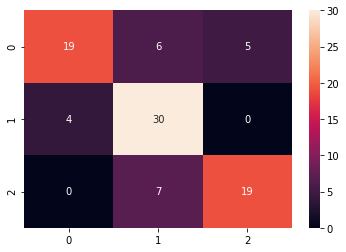

In [18]:
#Confusion matrix（RF）
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
sns.heatmap(result,annot=True,fmt="d")
print("Confusion Matrix:")
print(result)

#
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)

#ACC
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[19  6  5]
 [ 4 30  0]
 [ 0  7 19]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.80      0.81        30
           1       0.83      0.88      0.86        34
           2       0.76      0.73      0.75        26

    accuracy                           0.81        90
   macro avg       0.81      0.80      0.81        90
weighted avg       0.81      0.81      0.81        90

Accuracy: 0.8111111111111111


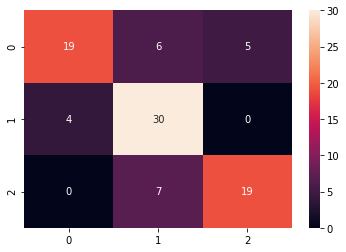

In [19]:
#Confusion matrix（xgb）
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
sns.heatmap(result,annot=True,fmt="d")
print("Confusion Matrix:")
print(result)

#
result1 = classification_report(y_test, test_pred)
print("Classification Report:",)
print (result1)

#ACC
result2 = accuracy_score(y_test,test_pred)
print("Accuracy:",result2)

In [43]:
from catboost import CatBoostClassifier#Catboost集成学习分类器

features = list(X.columns)
model_cb = CatBoostClassifier(task_type='GPU', iterations=100, 
                              random_state = 2021,
                              #loss_function='CrossEntropy',
                              eval_metric="AUC")

In [140]:
from catboost import CatBoostClassifier#Catboost集成学习分类器

features = list(X.columns)
model_cb = CatBoostClassifier(iterations=1000,learning_rate=0.1,max_depth=7,verbose=100,
                                      early_stopping_rounds=500,task_type='GPU',eval_metric='AUC',
                                      )

In [141]:
model_cb.fit(X_train, y_train, plot=True, 
             eval_set=(X_test, y_test))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Default metric period is 5 because AUC is/are not implemented for GPU
AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	test: 0.6725113	best: 0.6725113 (0)	total: 9.95ms	remaining: 9.94s
120:	test: 0.9322524	best: 0.9322524 (119)	total: 1.11s	remaining: 8.1s
240:	test: 0.9371795	best: 0.9375566 (239)	total: 2.16s	remaining: 6.81s
360:	test: 0.9425591	best: 0.9426094 (351)	total: 3.21s	remaining: 5.67s
480:	test: 0.9423077	best: 0.9428356 (368)	total: 4.24s	remaining: 4.58s
600:	test: 0.9425842	best: 0.9439165 (569)	total: 5.29s	remaining: 3.51s
720:	test: 0.9452740	best: 0.9452740 (718)	total: 6.35s	remaining: 2.46s
840:	test: 0.9427099	best: 0.9452740 (718)	total: 7.38s	remaining: 1.4s
960:	test: 0.9445450	best: 0.9456259 (943)	total: 8.4s	remaining: 341ms
999:	test: 0.9438411	best: 0.9456259 (943)	total: 8.73s	remaining: 0us
bestTest = 0.9456259427
bestIteration = 943
Shrink model to first 944 iterations.


In [142]:
test_pred = model_cb.predict(X_test)
test_pred_p = model_cb.predict_proba(X_test)[:,1]

In [143]:
from sklearn.metrics import classification_report#查看catboost的精度


result1 = classification_report(y_test, test_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,test_pred)
print("Accuracy:",result2)

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.80      0.81        30
           1       0.85      0.85      0.85        34
           2       0.81      0.85      0.83        26

    accuracy                           0.83        90
   macro avg       0.83      0.83      0.83        90
weighted avg       0.83      0.83      0.83        90

Accuracy: 0.8333333333333334


In [57]:
# 刷选类别特征
cate_cols = [x for x in dfdata.columns 
             if dfdata[x].dtype not in [np.float32,np.float64] and x!=label_col]
for col in cate_cols:
    dfdata[col] = pd.Categorical(dfdata[col]) 
    dftest[col] = pd.Categorical(dftest[col]) 


NameError: name 'dfdata' is not defined

In [56]:
from catboost import cv
from catboost import CatBoostClassifier, Pool, metrics, cv
# 设置参数空间
params = {}
params['loss_function'] = 'Logloss'
params['iterations'] = 80
params['custom_loss'] = 'AUC'
params['random_seed'] = 63
params['learning_rate'] = 0.5
# 直接使用catboost中自带的cv参数。
cv_data = cv(
    params = params,
    pool=Pool(data=X, label=y),
    fold_count=5,
    shuffle=True,
    partition_random_seed=0,
    plot=True,   # 设置可视化过程
    stratified=False, 
    verbose=False
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]


CatBoostError: C:/Program Files (x86)/Go Agent/pipelines/BuildMaster/catboost.git/catboost/private/libs/target/target_converter.cpp:379: Target with classes must contain only 2 unique values for binary classification